# Load and Read Data

In [1]:
import codecs
import pandas as pd
import numpy as np

file = codecs.open('dataset/socialmedia_relevant_cols.csv', encoding='utf-8', errors='replace')
tweets = pd.read_csv(file)
tweets.head()

,text,choose_one,class_label
0,Just happened a terrible car crash,Relevant,1
1,Our Deeds are the Reason of this #earthquake M...,Relevant,1
2,"Heard about #earthquake is different cities, s...",Relevant,1
3,"there is a forest fire at spot pond, geese are...",Relevant,1
4,Forest fire near La Ronge Sask. Canada,Relevant,1


In [2]:
tweets.shape

(10876, 3)

# Tokenize all Text Data with Lowercase, Lemmatization, no-stop-word form and no-URL links

In [3]:
import re
from nltk.tokenize import RegexpTokenizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

tweets['text'] = tweets['text'].apply(lambda x: re.sub(r'http\S+', '', x)).str.lower()

def normalizer(list_of_tokens):
    wnl = WordNetLemmatizer()
    stops = stopwords.words('english')
    stops.extend(['u', 'via', 'amp', 'us', 'get', 'like', 'go', 'would', 'rt', 'one', 'got'])                   
    # 'u' stands for 'you'; 'via' same as 'by'; 'amp' is special for HML writing
    
    return [wnl.lemmatize(word) for word in list_of_tokens if word not in stops]

tweets['tokens'] = tweets['text'].apply(RegexpTokenizer(pattern=r'[a-z]+').tokenize).apply(normalizer)

tweets.head()

,text,choose_one,class_label,tokens
0,just happened a terrible car crash,Relevant,1,"[happened, terrible, car, crash]"
1,our deeds are the reason of this #earthquake m...,Relevant,1,"[deed, reason, earthquake, may, allah, forgive]"
2,"heard about #earthquake is different cities, s...",Relevant,1,"[heard, earthquake, different, city, stay, saf..."
3,"there is a forest fire at spot pond, geese are...",Relevant,1,"[forest, fire, spot, pond, goose, fleeing, acr..."
4,forest fire near la ronge sask. canada,Relevant,1,"[forest, fire, near, la, ronge, sask, canada]"


In [4]:
tweets.groupby('choose_one').count()

,text,class_label,tokens
choose_one,,,
Can't Decide,16,16,16
Not Relevant,6187,6187,6187
Relevant,4673,4673,4673


# Histgram for Top 30 most frequecnt words

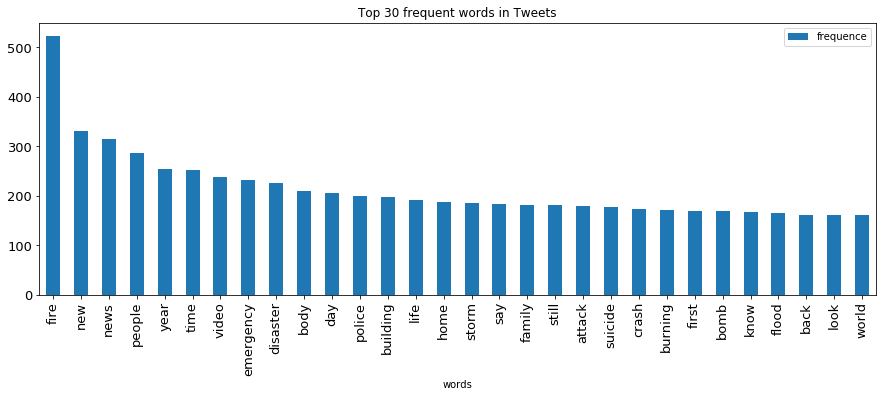

In [6]:
    from collections import Counter
    import matplotlib.pyplot as plt

    all_normalized_word = [word for tokens in tweets['tokens'] for word in tokens]

    count_all_words = Counter(all_normalized_word)
    most_30_words = count_all_words.most_common(30)
    most_30_words_df = pd.DataFrame(most_30_words, columns=['words', 'frequence'])
    most_30_words_df.plot(kind='bar', x='words', figsize=(15, 5), fontsize=13)
    plt.title('Top 30 frequent words in Tweets')
    plt.show()

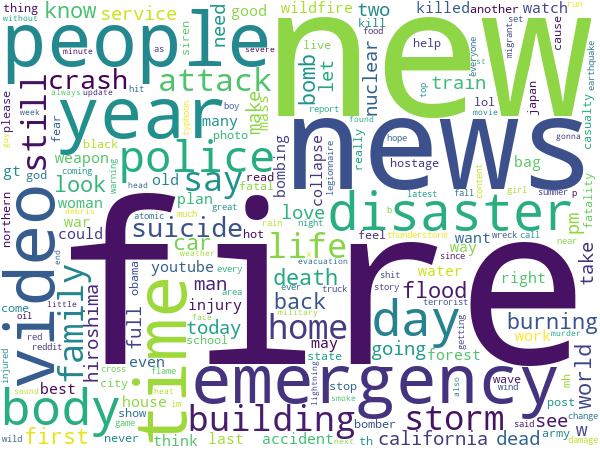

In [7]:
import wordcloud

wc = wordcloud.WordCloud(background_color='white', width=600, height=450)

wc.generate_from_frequencies(count_all_words)

wc.to_image()

# Data Preprocessing for Supervised Machine Learning

In [8]:
tweets['rebuild_text'] = tweets['tokens'].apply(lambda x:str(' '.join(x)))

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(tweets['rebuild_text'], tweets['class_label'], 
                                                    test_size = 0.25, random_state=86)

# Construct Bag of Word Vectorizer

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vec = CountVectorizer(analyzer = 'word', token_pattern = r'[a-z]+', ngram_range = (1,2))

bow = {}
bow['train'] = (bow_vec.fit_transform(X_train), y_train)
bow['test'] = (bow_vec.transform(X_test), y_test)

# Construct Tf - Idf Vectorizer

In [8]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vec = TfidfVectorizer(analyzer = 'word', token_pattern = r'[a-z]+', stop_words = 'english', ngram_range = (1,2),
                           norm = 'l2')

tfidf = {}
tfidf['train'] = (tfidf_vec.fit_transform(X_train), y_train)
tfidf['test'] = (tfidf_vec.transform(X_test), y_test)

# Construct Word to Vector in Gensim

In [9]:
from gensim import models

w2v_vectors = models.KeyedVectors.load_word2vec_format('C:/Users/Songst/Desktop/projects/Classify Tweets by NLP/dataset/GoogleNews-vectors-negative300.bin', 
                                               binary=True)

C:\Users\Songst\AppData\Roaming\Python\Python36\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [26]:
(w2v_vectors.get_vector('just') + w2v_vectors.get_vector('happened'))/2

array([ 5.74951172e-02, -9.47570801e-03,  1.42883301e-01,  2.66113281e-02,
       -3.28979492e-02, -1.63574219e-01,  4.80957031e-02, -1.56738281e-01,
        1.73461914e-01,  1.03027344e-01, -1.92794800e-02, -8.15429688e-02,
       -3.91845703e-02, -3.04870605e-02, -1.98974609e-02,  2.14355469e-01,
        4.32739258e-02,  1.08886719e-01,  1.89086914e-01, -1.56738281e-01,
       -8.34960938e-02,  1.33666992e-01,  3.92456055e-02, -4.92248535e-02,
        1.05102539e-01,  6.83593750e-02,  2.78930664e-02,  2.53295898e-03,
        1.61621094e-01,  3.86962891e-02, -1.16699219e-01, -4.58984375e-02,
       -1.83105469e-03, -1.40136719e-01, -8.36181641e-02,  6.54754639e-02,
        9.42382812e-02, -1.14257812e-01,  6.14013672e-02,  2.14355469e-01,
        1.04125977e-01, -1.41601562e-02,  1.20361328e-01, -1.12880707e-01,
       -4.01306152e-03,  8.39843750e-02, -4.05883789e-02, -7.03992844e-02,
        3.02734375e-02, -6.50787354e-03, -1.08032227e-02,  7.93457031e-03,
        1.16699219e-01,  

In [18]:
def mean_w2v(token_list, vector, generate_missing=False, k=300):
    if len(token_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in token_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in token_list]
    return np.divide(np.sum(vectorized, axis=0), len(vectorized))

def get_word_embedding(vectors, normalized_tokens, generate_missing=False):
    embeddings = normalized_tokens.apply(lambda x: mean_w2v(x, vectors, generate_missing=generate_missing))
    return list(embeddings)

w2v_embedding = get_word_embedding(w2v_vectors, tweets['tokens'])

In [24]:
w2v_embedding[0]

array([ 1.07482910e-01,  2.21252441e-02,  8.85009766e-02, -7.83081055e-02,
        2.47039795e-02, -1.23779297e-01,  3.10058594e-02, -1.23396873e-01,
        2.49511719e-01,  1.44165039e-01,  7.97405243e-02, -1.51855469e-01,
       -1.18896484e-01, -5.78155518e-02,  1.87377930e-02,  1.95617676e-01,
       -1.14974976e-02,  1.08276367e-01,  1.69311523e-01, -1.82006836e-01,
        5.25207520e-02,  1.88842773e-01, -4.75158691e-02, -3.69415283e-02,
        1.76330566e-01,  5.33752441e-02, -3.87878418e-02,  6.73828125e-02,
        2.74944305e-01, -8.59985352e-02, -2.08984375e-01, -7.45239258e-02,
        7.04956055e-03, -8.45603943e-02, -6.63757324e-02,  8.11767578e-02,
        1.48803711e-01, -5.73730469e-02, -7.42187500e-02,  1.13647461e-01,
        4.75463867e-02, -2.38800049e-02,  2.76245117e-01, -9.96551514e-02,
       -2.57568359e-02, -5.12695312e-03,  2.78282166e-02,  1.74255371e-02,
        1.46728516e-01,  5.35087585e-02, -3.84063721e-02,  2.46887207e-01,
        9.07440186e-02,  

In [11]:
X_train_w2v, X_test_w2v, y_train_w2v, y_test_w2v = train_test_split(w2v_embedding, tweets['class_label'],
                                                               test_size=0.25, random_state=86)
w2v = {}
w2v['train'] = (np.array(X_train_w2v), np.array(y_train_w2v))
w2v['test'] = (np.array(X_test_w2v), np.array(y_test_w2v))

# Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(C=0.1, class_weight='balanced', solver='newton-cg', multi_class='multinomial', n_jobs = -1)

# Linear SVM

In [13]:
from sklearn.svm import LinearSVC

lsvc = LinearSVC(C = 0.1, class_weight = 'balanced')

# Naive Bayes

In [14]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB

gnb = GaussianNB()
mnb = MultinomialNB()   

# Decision Tree

In [15]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(class_weight='balanced')

#param = {'max_depth':[11, 15, 19], 'min_samples_leaf':[0.01, 0.05, 0.1], 'criterion':['gini', 'entropy']}
#dt_grid = GridSearchCV(dt, param_grid=param, cv=5, n_jobs=-1)

# Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=500, max_depth=50, min_samples_leaf=5, class_weight='balanced', n_jobs=-1,
                            random_state=86)

# XGBoost

In [17]:
from xgboost import XGBClassifier

xgb = XGBClassifier(max_depth=20, reg_lambda=0.1, n_estimators=300, n_jobs=-1, random_state=86)

# lightGBM

In [18]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimator=500, n_job=-1)

# Fitting Model

In [201]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

def classification_model(vectorizer, classifier):
    ### choice of vectorizer: bow / tfidf / w2v ###
    ### choice of classifier: logreg(Logistic Regression) / lsvc(LinearSVM) / mnb(Multinoimal Navie Bayes, only for bow and tfidf)
    ### gnb(Gauss Naive Bayes, only for w2v) / dt(Descision Tree) / rfc(Random Forest) / xgb(XGBoost) / lgbm(LightGBM) ###

    classifier.fit(vectorizer['train'][0].astype('float64'), vectorizer['train'][1])
    predict = classifier.predict(vectorizer['test'][0].astype('float64'))
    
    accuracy_score = accuracy_score(vectorizer['test'][1], predict)
    cm = confusion_matrix(vectorizer['test'][1], predict)
    
    return accuracy_score, cm

In [153]:
vectorizers = [bow, tfidf, w2v]
classifiers = [logreg, lsvc, dt, rfc, xgb, lgbm]

accuracy_single = []
confusion_matrix_single = []
for v in vectorizers:
    for c in classifiers:
        fit = classification_model(v, c)
        accuracy_single.append(fit[0])
        confusion_matrix_single.append(fit[1])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Program Files (x86)\Microsoft Visual Stu

In [132]:
accuracy_single = accuracy_single[0:18]
confusion_matrix_single = confusion_matrix_single[0:18]

In [154]:
model_mnb_bow = classification_model(bow, mnb)
model_mnb_tfidf = classification_model(tfidf, mnb)
model_gnb_w2v = classification_model(w2v, gnb)

accuracy_single.extend([model_mnb_bow[0], model_mnb_tfidf[0], None, None, None, model_gnb_w2v[0]])
confusion_matrix_single.extend([model_mnb_bow[1], model_mnb_tfidf[1], None, None, None, model_gnb_w2v[1]])

In [279]:
accuracy_single_df = pd.DataFrame(np.array(accuracy_single).reshape(8, 3), index=['Logistic', 'LinearSVM', 'Decision_Tree', 'Random_Forest', 
                            'XGBoost', 'LightGBM', 'Multinomial_NB', 'Gauss_NB'], columns=['Bag_of_Words', 'Tf-Idf', 'Google_Embeddings'],
                          dtype='float64')
accuracy_single_df

,Bag_of_Words,Tf-Idf,Google_Embeddings
Logistic,0.799559,0.802133,0.752850
LinearSVM,0.791100,0.798455,0.794410
Decision_Tree,0.805443,0.805811,0.730416
Random_Forest,0.792939,0.790364,0.786686
XGBoost,0.766458,0.791467,0.680765
LightGBM,0.809121,0.807282,0.812431
Multinomial_NB,0.802133,0.800294,NaN
Gauss_NB,NaN,NaN,0.759103


# Best in each vectorizer

In [281]:
print("The best single classifier for Bag of Words vectorizer is " + accuracy_single_df['Bag_of_Words'].idxmax() + 
     "; the accuaracy is " + str(accuracy_single_df.loc[accuracy_single_df['Bag_of_Words'].idxmax()][0]))
print("The best single classifier for Tf-Idf vectorizer is " + accuracy_single_df['Tf-Idf'].idxmax() +
     "; the accuaracy is " + str(accuracy_single_df.loc[accuracy_single_df['Bag_of_Words'].idxmax()][1]))
print("The best single classifier for Google Embeddings vectorizer is " + accuracy_single_df['Google_Embeddings'].idxmax() +
     "; the accuaracy is " + str(accuracy_single_df.loc[accuracy_single_df['Bag_of_Words'].idxmax()][2]))

The best single classifier for Bag of Words vectorizer is LightGBM; the accuaracy is 0.8091210003677822
The best single classifier for Tf-Idf vectorizer is LightGBM; the accuaracy is 0.80728208900331
The best single classifier for Google Embeddings vectorizer is LightGBM; the accuaracy is 0.8124310408238323


# Confusion Matrix for the best classifier respectively

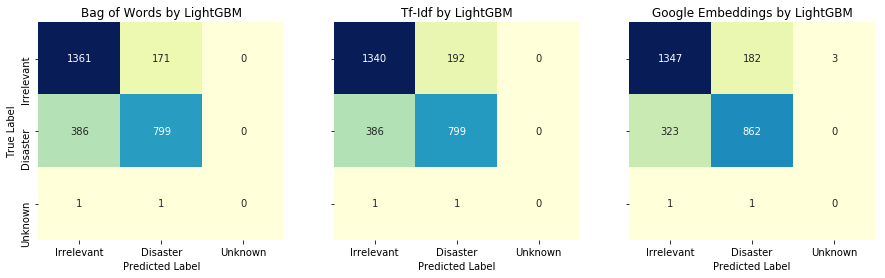

In [157]:
import seaborn as sns

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(15)

ax1 = sns.heatmap(confusion_matrix_single[5], vmin=0, cmap='YlGnBu', cbar=False, annot=True, fmt='d', ax=ax1)
ax1.set_title('Bag of Words by LightGBM')
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')

ax2 = sns.heatmap(confusion_matrix_single[11], vmin=0, cmap='YlGnBu', cbar=False, annot=True, fmt='d', ax=ax2)
ax2.set_title('Tf-Idf by LightGBM')
ax2.set_xlabel('Predicted Label')

ax3 = sns.heatmap(confusion_matrix_single[17], vmin=0, cmap='YlGnBu', cbar=False, annot=True, fmt='d', ax=ax3,
                 xticklabels=['Irrelevant', 'Disaster', 'Unknown'], yticklabels=['Irrelevant', 'Disaster', 'Unknown'])
ax3.set_title('Google Embeddings by LightGBM')
ax3.set_xlabel('Predicted Label')

plt.show()

# Voting Esembling

In [158]:
def voting_classifier(vectorizer):
    from sklearn.ensemble import VotingClassifier
    
    estimator = [('Logistic Regression',logreg), ('LinearSVC', lsvc), ('Decision Tree', dt),
            ('Random Forest', rfc), ('XGBoost', xgb), ('LightGBM', lgbm)]

    vote = VotingClassifier(estimators=estimator, n_jobs=-1)
    vote.fit(vectorizer['train'][0].astype('float64'), vectorizer['train'][1])

    predict = vote.predict(vectorizer['test'][0].astype('float64'))
    
    accuracy_score = accuracy_score(vectorizer['test'][1], predict)
    cm = confusion_matrix(vectorizer['test'][1], predict)
    
    return accuracy_score, cm

In [159]:
accuracy_voting = []
confusion_matrix_voting = []

for v in vectorizers:
    accuracy_voting.append(voting_classifier(v)[0])
    confusion_matrix_voting.append(voting_classifier(v)[1])

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Program Files (x86)\Microsoft Visual Stu

In [236]:
print("The accurary of Bag of Words by voting esembling is " + str(accuracy_voting[0]))
print("The accurary of Tf-Idf by voting esembling is " + str(accuracy_voting[1]))
print("The accurary of Google Embeddings by voting esembling is " + str(accuracy_voting[2]))

The accurary of Bag of Words by voting esembling is 0.8069143067304156
The accurary of Tf-Idf by voting esembling is 0.8131666053696212
The accurary of Google Embeddings by voting esembling is 0.8135343876425156


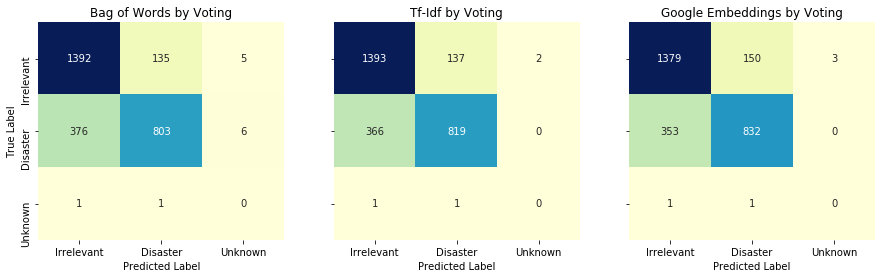

In [172]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(15)

ax1 = sns.heatmap(confusion_matrix_voting[0], vmin=0, cmap='YlGnBu', cbar=False, annot=True, fmt='d', ax=ax1)
ax1.set_title('Bag of Words by Voting')
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')

ax2 = sns.heatmap(confusion_matrix_voting[1], vmin=0, cmap='YlGnBu', cbar=False, annot=True, fmt='d', ax=ax2)
ax2.set_title('Tf-Idf by Voting')
ax2.set_xlabel('Predicted Label')

ax3 = sns.heatmap(confusion_matrix_voting[2], vmin=0, cmap='YlGnBu', cbar=False, annot=True, fmt='d', ax=ax3,
                 xticklabels=['Irrelevant', 'Disaster', 'Unknown'], yticklabels=['Irrelevant', 'Disaster', 'Unknown'])
ax3.set_title('Google Embeddings by Voting')
ax3.set_xlabel('Predicted Label')

plt.show()

# Neural Network

In [241]:
from keras.layers import Dense
from keras.models import Sequential
from keras.callbacks import EarlyStopping

def neural_network(vectorizer):
    
    model = Sequential()
    early_stop_moniter = EarlyStopping(patience=2)

    model.add(Dense(10, activation='relu', input_shape=(vectorizer['train'][0].shape[1], )))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(3, activation='softmax'))

    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    model.fit(vectorizer['train'][0], vectorizer['train'][1], 
              validation_data=(vectorizer['test'][0], vectorizer['test'][1]), 
              epochs=30, batch_size=64, callbacks=[early_stop_moniter])
    
    predict_class = model.predict_classes(vectorizer['test'][0])
    
    accuracy = accuracy_score(vectorizer['test'][1], predict_class)
    cm = confusion_matrix(vectorizer['test'][1], predict_class)
    
    return accuracy, cm, model

In [243]:
neural_bow = neural_network(bow)

Train on 8157 samples, validate on 2719 samples
Epoch 1/30
8157/8157 [==============================] - 10s 1ms/step - loss: 0.8937 - acc: 0.6434 - val_loss: 0.6387 - val_acc: 0.7745
Epoch 2/30
8157/8157 [==============================] - 8s 1ms/step - loss: 0.3771 - acc: 0.8830 - val_loss: 0.4481 - val_acc: 0.8076
Epoch 3/30
8157/8157 [==============================] - 8s 1ms/step - loss: 0.1440 - acc: 0.9571 - val_loss: 0.4601 - val_acc: 0.8069
Epoch 4/30
8157/8157 [==============================] - 9s 1ms/step - loss: 0.0883 - acc: 0.9694 - val_loss: 0.4837 - val_acc: 0.8025


In [244]:
neural_tfidf = neural_network(tfidf)

Train on 8157 samples, validate on 2719 samples
Epoch 1/30
8157/8157 [==============================] - 9s 1ms/step - loss: 0.9689 - acc: 0.4260 - val_loss: 0.8021 - val_acc: 0.4402
Epoch 2/30
8157/8157 [==============================] - 8s 991us/step - loss: 0.6515 - acc: 0.8032 - val_loss: 0.5046 - val_acc: 0.8076
Epoch 3/30
8157/8157 [==============================] - 8s 996us/step - loss: 0.3182 - acc: 0.9247 - val_loss: 0.4377 - val_acc: 0.8010
Epoch 4/30
8157/8157 [==============================] - 8s 992us/step - loss: 0.1474 - acc: 0.9644 - val_loss: 0.4637 - val_acc: 0.7962
Epoch 5/30
8157/8157 [==============================] - 8s 997us/step - loss: 0.0915 - acc: 0.9733 - val_loss: 0.4894 - val_acc: 0.7959


In [245]:
neural_w2v = neural_network(w2v)

Train on 8157 samples, validate on 2719 samples
Epoch 1/30
8157/8157 [==============================] - 1s 161us/step - loss: 0.8525 - acc: 0.5829 - val_loss: 0.6421 - val_acc: 0.7047
Epoch 2/30
8157/8157 [==============================] - 0s 28us/step - loss: 0.5568 - acc: 0.7635 - val_loss: 0.5023 - val_acc: 0.7731
Epoch 3/30
8157/8157 [==============================] - 0s 34us/step - loss: 0.5004 - acc: 0.7793 - val_loss: 0.4828 - val_acc: 0.7768
Epoch 4/30
8157/8157 [==============================] - 0s 27us/step - loss: 0.4878 - acc: 0.7828 - val_loss: 0.4760 - val_acc: 0.7863
Epoch 5/30
8157/8157 [==============================] - 0s 29us/step - loss: 0.4801 - acc: 0.7873 - val_loss: 0.4703 - val_acc: 0.7911
Epoch 6/30
8157/8157 [==============================] - 0s 28us/step - loss: 0.4733 - acc: 0.7913 - val_loss: 0.4672 - val_acc: 0.7915
Epoch 7/30
8157/8157 [==============================] - 0s 28us/step - loss: 0.4674 - acc: 0.7921 - val_loss: 0.4658 - val_acc: 0.7915
Epoch 

In [246]:
print("The accurary of Bag of Words by neural network is " + str(neural_bow[0]))
print("The accurary of Tf-Idf by neural network is " + str(neural_tfidf[0]))
print("The accurary of Google Embeddings by neural network is " + str(neural_w2v[0]))

The accurary of Bag of Words by neural network is 0.8025009194556822
The accurary of Tf-Idf by neural network is 0.7958808385435822
The accurary of Google Embeddings by neural network is 0.8028687017285767


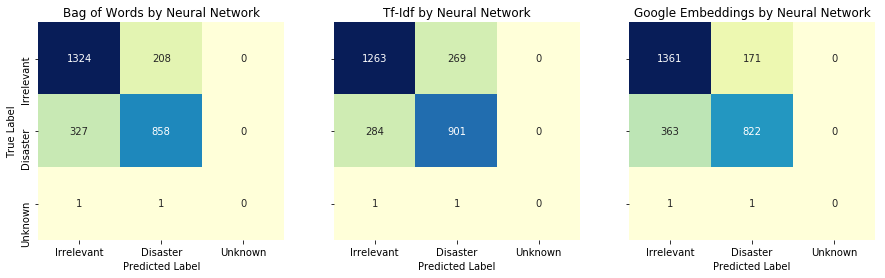

In [247]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, sharey=True, sharex=True)
fig.set_figheight(4)
fig.set_figwidth(15)

ax1 = sns.heatmap(neural_bow[1], vmin=0, cmap='YlGnBu', cbar=False, annot=True, fmt='d', ax=ax1)
ax1.set_title('Bag of Words by Neural Network')
ax1.set_xlabel('Predicted Label')
ax1.set_ylabel('True Label')

ax2 = sns.heatmap(neural_tfidf[1], vmin=0, cmap='YlGnBu', cbar=False, annot=True, fmt='d', ax=ax2)
ax2.set_title('Tf-Idf by Neural Network')
ax2.set_xlabel('Predicted Label')

ax3 = sns.heatmap(neural_w2v[1], vmin=0, cmap='YlGnBu', cbar=False, annot=True, fmt='d', ax=ax3,
                 xticklabels=['Irrelevant', 'Disaster', 'Unknown'], yticklabels=['Irrelevant', 'Disaster', 'Unknown'])
ax3.set_title('Google Embeddings by Neural Network')
ax3.set_xlabel('Predicted Label')

plt.show()

In [288]:
temp = [accuracy_single_df.loc['LightGBM'].tolist(), [accuracy_voting[i] for i in range(3)],
       [neural_bow[0], neural_tfidf[0], neural_w2v[0]]]
accuracy_df = pd.DataFrame(temp, index=['LightGBM', 'Voting Esemblings', 'Neural Network'],
                           columns=['Bag_of_Words', 'Tf-Idf', 'Google_Embeddings'])

In [289]:
accuracy_df

,Bag_of_Words,Tf-Idf,Google_Embeddings
LightGBM,0.809121,0.807282,0.812431
Voting Esemblings,0.806914,0.813167,0.813534
Neural Network,0.802501,0.795881,0.802869


In [290]:
print("The best classifier for Bag of Words vectorizer is " + accuracy_df['Bag_of_Words'].idxmax() + 
     "; the accuaracy is " + str(accuracy_df.loc[accuracy_df['Bag_of_Words'].idxmax()][0]))
print("The best classifier for Tf-Idf vectorizer is " + accuracy_df['Tf-Idf'].idxmax() +
     "; the accuaracy is " + str(accuracy_df.loc[accuracy_df['Bag_of_Words'].idxmax()][1]))
print("The best classifier for Google Embeddings vectorizer is " + accuracy_df['Google_Embeddings'].idxmax() +
     "; the accuaracy is " + str(accuracy_df.loc[accuracy_df['Bag_of_Words'].idxmax()][2]))

The best classifier for Bag of Words vectorizer is LightGBM; the accuaracy is 0.8091210003677822
The best classifier for Tf-Idf vectorizer is Voting Esemblings; the accuaracy is 0.80728208900331
The best classifier for Google Embeddings vectorizer is Voting Esemblings; the accuaracy is 0.8124310408238323
